In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

ALGORITH 1- K MEANS CLUSTERING

In [ ]:
x, y=make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)
#AS std is leass 0.6 the data points will be very close, if increased they will far from each other

In [ ]:
df=pd.DataFrame(x, columns=['Feature_1', 'Feature_2'])
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [ ]:
x_scaled=StandardScaler().fit_transform(df)

In [ ]:
df=pd.DataFrame(x_scaled, columns=['Feature_1', 'Feature_2'])
df

,Feature_1,Feature_2
0,-0.969818,-1.339938
1,0.963344,0.082248
2,1.578647,0.012635
3,-0.246735,1.035579
4,1.454170,0.049585
...,...,...
495,-0.938329,-1.189653
496,-0.207071,1.202193
497,1.260640,0.241350
498,-1.180346,-1.178170


ELBOW METHOD

In [ ]:
#Capturing value of WCSS(Within Clusters Sum of Square distance) , known as inertia. Inertia and WCSS is same thing
wcss=[]
k_range=range(1,11) #will run 1 to 10, Heere we are trying to find ideal value of k , so will will chaeck at different values  from 1 to 10

In [ ]:
for k in k_range:
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)


In [ ]:
wcss

[1000.0000000000006,
 297.8954141051723,
 11.575484723104985,
 9.752067977356848,
 8.257175272446279,
 6.917577320416797,
 6.334755391595288,
 5.704177177901426,
 5.060234133532074,
 4.7623618981303935]

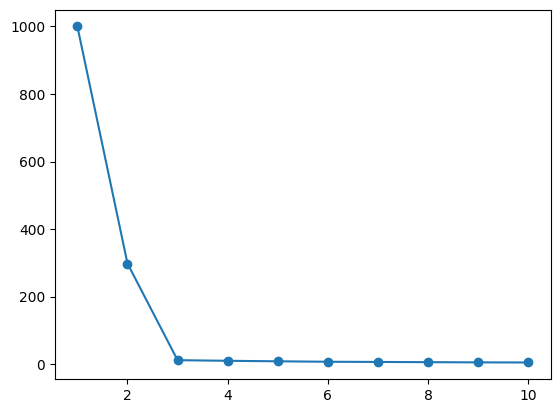

In [ ]:
plt.plot(k_range, wcss, marker='o')

In above elbow curve after k=3 , the elbow line is staght and not going downwards, so we will take k=3, means 3 cluster s we will make

In [ ]:
k_means_final=KMeans(n_clusters=3, random_state=42)

In [ ]:
clusters_label=k_means_final.fit_predict(x_scaled)
clusters_label

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

In above output we have labeled the clusters, cluster1=0, cluster2=1, cluster3=2, as k=3

In [ ]:
df['cluster']=clusters_label

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

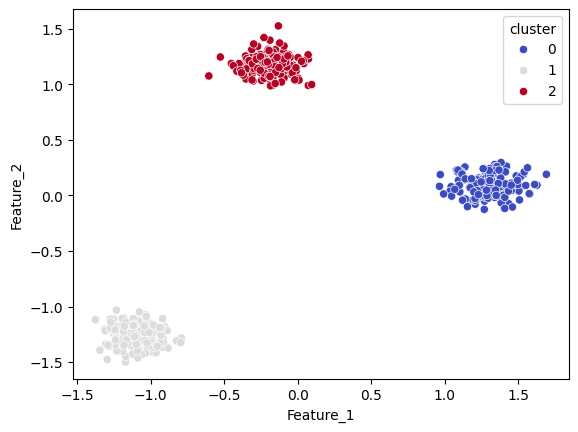

In [ ]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['cluster'], palette='coolwarm')

ALGORITHM 2- DB Scan ALGORITHM

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X,Y=make_moons(n_samples=500, noise=0.05, random_state=42)

x, y: This is how the function returns the generated data.
x: This variable will contain the feature data (the coordinates of the points). It will be a NumPy array with a shape of (n_samples, 2), where each row represents a data point and the two columns represent the two features (x and y coordinates).
y: This variable will contain the true labels for each data point. Since make_moons generates two intertwined "moons," y will be a NumPy array of shape (n_samples,) containing either 0 or 1, indicating which moon each point belongs to.
n_samples=500: This parameter specifies the total number of data points to generate. In this case, 500 data points will be created.
noise=0.5: This is the parameter you asked about! The noise parameter controls the amount of Gaussian noise added to the data.
A noise value of 0 means no noise is added, and the two moon shapes will be perfectly separated.
A higher noise value (like 0.5 in this case) adds random fluctuations to the position of each data point. This makes the two moon shapes less distinct and causes some points from one moon to overlap with points from the other. This is important for simulating real-world data, which often contains noise and ambiguity.
random_state=42: This parameter is used to set the seed for the random number generator. Setting a random_state ensures that the same random data is generated every time you run the code. This is crucial for reproducibility, allowing you to get the same dataset and results consistently.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
X

array([[ 0.83058575, -0.44773257],
       [ 0.70167816,  0.81691843],
       [ 1.02208004, -0.49257102],
       [-0.31676455,  0.95343844],
       [ 0.29322631,  1.05718523],
       [ 1.25490304, -0.48343549],
       [ 1.05385133, -0.44269047],
       [ 0.03137971,  1.05301203],
       [ 0.62054473,  0.71309598],
       [ 1.7876566 , -0.14295878],
       [ 0.99907493,  0.09180641],
       [-0.70723041,  0.57499903],
       [ 1.46479643, -0.47111862],
       [ 0.42712245,  0.83103216],
       [ 1.05341942, -0.50102941],
       [ 1.19597671, -0.49472393],
       [ 1.99422286,  0.42426007],
       [ 0.93175527,  0.39426183],
       [ 0.41104275, -0.33348189],
       [ 1.49073255, -0.38560138],
       [ 1.97517181,  0.35930615],
       [ 2.0470942 ,  0.41068552],
       [-0.00592133,  0.14862165],
       [ 0.82592072, -0.42998975],
       [ 0.54309448,  0.75144817],
       [ 1.8709548 ,  0.20141701],
       [ 1.9224317 ,  0.43263225],
       [-0.86765136,  0.45505598],
       [ 0.28216036,

In [ ]:
Y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [ ]:
dff=pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
dff

,Feature_1,Feature_2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [ ]:
X_scaled=StandardScaler().fit_transform(dff)

In [ ]:
pd.DataFrame(dff)

,Feature_1,Feature_2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [ ]:
kmeans=KMeans(n_clusters=2, random_state=42)
kmeans_label=kmeans.fit_predict(X_scaled)

In [ ]:
dff['kmeans_cluster']=kmeans_label

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

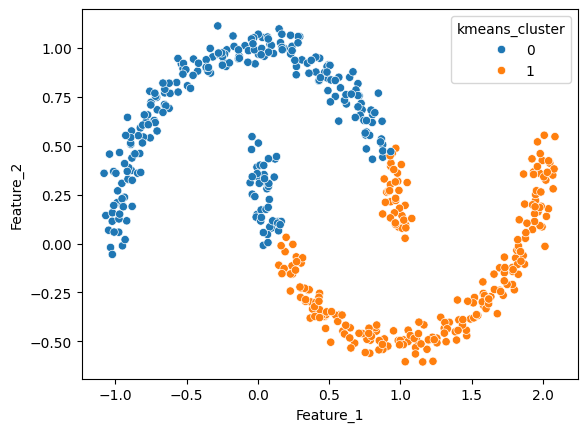

In [ ]:
sns.scatterplot(x='Feature_1', y='Feature_2', hue='kmeans_cluster', data=dff, palette='tab10')

In the above visualtion you can see that there is a non circular data , 2 semicirculars shape , ideally data point one semicircle should make 1 complete structure and other semicircle points make a another cluster . But by applying KMEANS , it didnot happen , this is limitation of KMEANS , it does not work on non circular data
.

To prevent this we use DB scan

In [ ]:
dbscan=DBSCAN(eps=0.6, min_samples=5)
dbscan_labels=dbscan.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.3, min_samples=5): This line creates an instance of the DBSCAN class from scikit-learn. When creating the instance, we specify two crucial parameters:

eps (epsilon): This is the maximum distance between two samples for one to be considered as in the neighborhood of the other. Think of it as the radius of a circle around each data point. Any point within this radius is considered a neighbor. In this code, eps is set to 0.3. Choosing the right eps is critical and often requires some experimentation or analysis of the data's density.
min_samples: This is the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. A core point is a point that has at least min_samples points (including itself) within its eps radius. In this code, min_samples is set to 5.
Points are classified by DBSCAN as:

Core point: A point with at least min_samples points within its eps neighborhood.
Border point: A point that has at least one core point in its eps neighborhood but is not a core point itself.
Noise point: A point that is neither a core point nor a border point.
dbscan_labels = dbscan.fit_predict(X_scaled): This line performs two main actions:

fit(X_scaled): This part of the code fits the DBSCAN model to your scaled data X_scaled. The algorithm analyzes the density of points based on the specified eps and min_samples to identify core points, border points, and noise points, and to group the core and border points into clusters.
predict(X_scaled): Although DBSCAN doesn't have a traditional predict method like some other clustering algorithms (as it doesn't learn explicit cluster centers), fit_predict is a convenience function that first fits the model and then returns the cluster labels for each data point in X_scaled.
The dbscan_labels variable will store a NumPy array containing the cluster label for each data point in the original X_scaled data. Points that are considered noise by DBSCAN will be assigned a label of -1. Points belonging to the same cluster will have the same non-negative integer label (e.g., 0, 1, 2, etc.).

In essence, this code is using DBSCAN with a neighborhood radius of 0.3 and a minimum of 5 samples to form a dense region to find clusters in the 'moons' dataset. The output dbscan_labels will tell you which cluster each point belongs to, or if it's considered noise.

In [ ]:
dff['dbscan_cluster']=dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

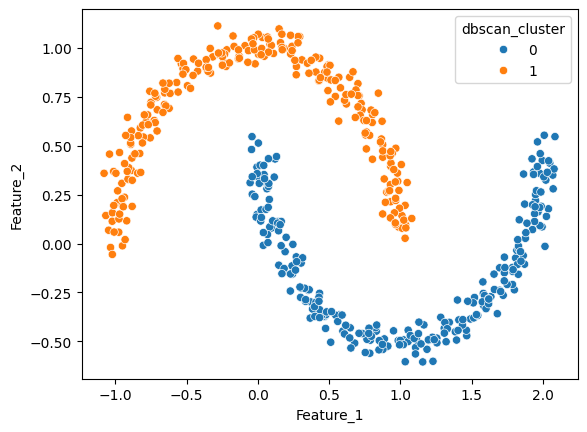

In [ ]:
sns.scatterplot(x=dff['Feature_1'], y=dff['Feature_2'],hue=dff['dbscan_cluster'], palette='tab10' )

DIMENSIONALITY REDUCTION

In [ ]:
#Dataset make_blobs
x, y=make_blobs(n_samples=500, n_features=5, centers=3, cluster_std=0.60, random_state=42)
#AS std is leass 0.6 the data points will be very close, if increased they will far from each other

In [ ]:
x_scaled=StandardScaler().fit_transform(df)

PCA- Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

In [ ]:
x_pca

array([[ 0.60017706, -1.53622196],
       [-1.54441044,  0.05954943],
       [-1.97135375,  0.25355225],
       [ 1.10734432,  1.18399763],
       [-1.88383444,  0.23371433],
       [-1.85377234,  0.17939896],
       [ 0.48073817, -1.41557891],
       [-1.80152287,  0.21355016],
       [-1.68600049,  0.13702885],
       [ 0.75728773, -1.5709574 ],
       [-1.72683747,  0.08523987],
       [ 0.97594872,  1.31468471],
       [ 0.88626771,  1.27649241],
       [ 1.03593984,  1.43754317],
       [-1.79334765,  0.38112108],
       [-1.87771954,  0.12047762],
       [ 1.09103777,  1.39390004],
       [ 0.8020839 , -1.56882248],
       [ 0.70083072, -1.45288642],
       [ 1.17047328,  1.16795379],
       [-1.65405445,  0.17516154],
       [ 1.05296896,  1.17624282],
       [-1.8263726 ,  0.25773064],
       [ 0.56706094, -1.46471344],
       [ 0.74260844, -1.54855378],
       [-1.81398538,  0.19091943],
       [-1.74879051,  0.30813066],
       [ 0.6369029 , -1.46660414],
       [ 0.68400524,

Now the 5 features have been reduced to 3, this is dimensionality reduction

In [ ]:
df_pca=pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
df_pca['label']=y

<Axes: xlabel='PC1', ylabel='PC2'>

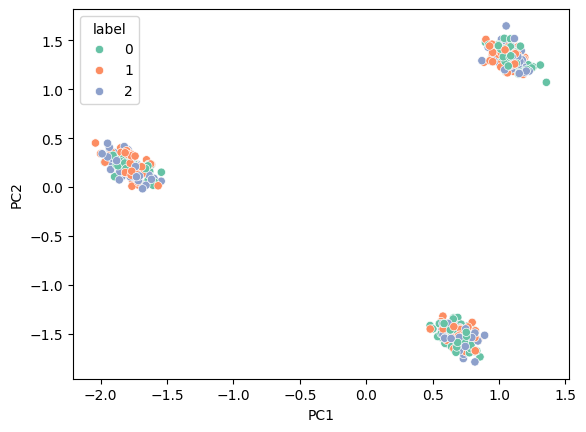

In [ ]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette='Set2')